In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns; sns.set()

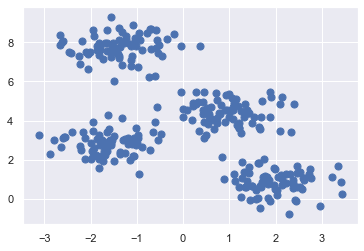

In [3]:
from sklearn.datasets.samples_generator import make_blobs # make_blobs create clusters of data sets
x, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0) # centers means clusters
plt.scatter(x[: , 0], x[: , 1], s = 50) # s is for size of data points

In [4]:
#k means is readily avilable 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 4) #n_clusters is the value of k
kmeans.fit(x) #fit is used any machine learning to trian the model
y_kmeans = kmeans.predict(x)

In [5]:
y_kmeans # assign a cluster numbers for samples 

array([3, 1, 0, 1, 3, 3, 2, 0, 1, 1, 2, 1, 0, 1, 3, 0, 0, 3, 2, 2, 3, 3,
       0, 2, 2, 0, 3, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 3, 0, 2, 0, 0,
       2, 2, 1, 2, 1, 3, 2, 3, 1, 3, 3, 2, 1, 2, 1, 3, 1, 0, 1, 2, 2, 2,
       1, 3, 1, 2, 0, 2, 1, 2, 2, 1, 2, 0, 3, 1, 3, 0, 3, 3, 1, 0, 3, 0,
       1, 1, 0, 3, 1, 2, 2, 0, 3, 3, 0, 2, 1, 3, 1, 3, 0, 3, 3, 0, 1, 0,
       2, 2, 3, 1, 3, 0, 1, 3, 3, 0, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 1, 2,
       2, 3, 1, 2, 2, 1, 0, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0,
       3, 2, 1, 2, 3, 0, 1, 0, 0, 3, 0, 2, 2, 0, 3, 0, 0, 1, 3, 0, 2, 1,
       3, 3, 0, 2, 3, 0, 2, 2, 0, 0, 0, 0, 3, 1, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 1, 0, 2, 3, 2, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 2, 2, 3, 3, 0,
       1, 3, 3, 2, 3, 2, 0, 1, 1, 0, 0, 1, 0, 3, 2, 0, 3, 2, 1, 2, 3, 0,
       3, 1, 1, 1, 1, 2, 2, 1, 0, 2, 3, 0, 2, 2, 2, 3, 3, 1, 0, 0, 2, 3,
       1, 2, 0, 1, 0, 3, 3, 2, 2, 0, 3, 3, 3, 0, 1, 1, 3, 3, 0, 3, 3, 3,
       1, 2, 1, 0, 3, 3, 1, 1, 1, 3, 3, 0, 1, 2], d

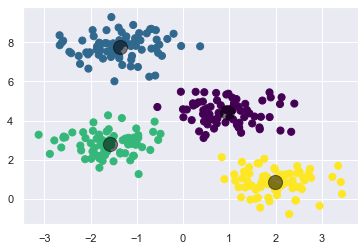

In [6]:
# implimentation of kmeans
# pairwise_distances_argmin it calculate distance between the points
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(x, n_clusters, rseed = 2):
    # random allocatrion of clusters 
    rng = np.random.RandomState(rseed)
    i = rng.permutation(x.shape[0])[:n_clusters]
    centers = x[i]

    
    while True:
        # assign label based on closet center
        label = pairwise_distances_argmin(x, centers)

        #find a new center from the means of point
        new_centers = np.array([x[label == i].mean(0)
                             for i in range(n_clusters)])
        #check for convergence 
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, label
centers, label = find_clusters(x,4)
plt.scatter(x[:,0], x[:,1], c=y_kmeans, s = 50, cmap='viridis')

plt.scatter(centers[:,0], centers[:, 1], c = 'black', s = 200, alpha = 0.5)
        